In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=[20,8]
import datetime as dt

In [2]:
df = pd.read_csv("OnlineRetail.csv", encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df['Total Amount'] = df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   Total Amount  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [6]:
df1 = df.copy()
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [7]:
df_country = df.groupby(['Country']).sum()
df_country = df_country.sort_values('Total Amount',ascending=False)
df_country.drop(columns=['UnitPrice','CustomerID'])

,Quantity,Total Amount
Country,,
United Kingdom,4263829,8187806.364
Netherlands,200128,284661.540
EIRE,142637,263276.820
Germany,117448,221698.210
France,110480,197403.900
Australia,83653,137077.270
Switzerland,30325,56385.350
Spain,26824,54774.580
Belgium,23152,40910.960


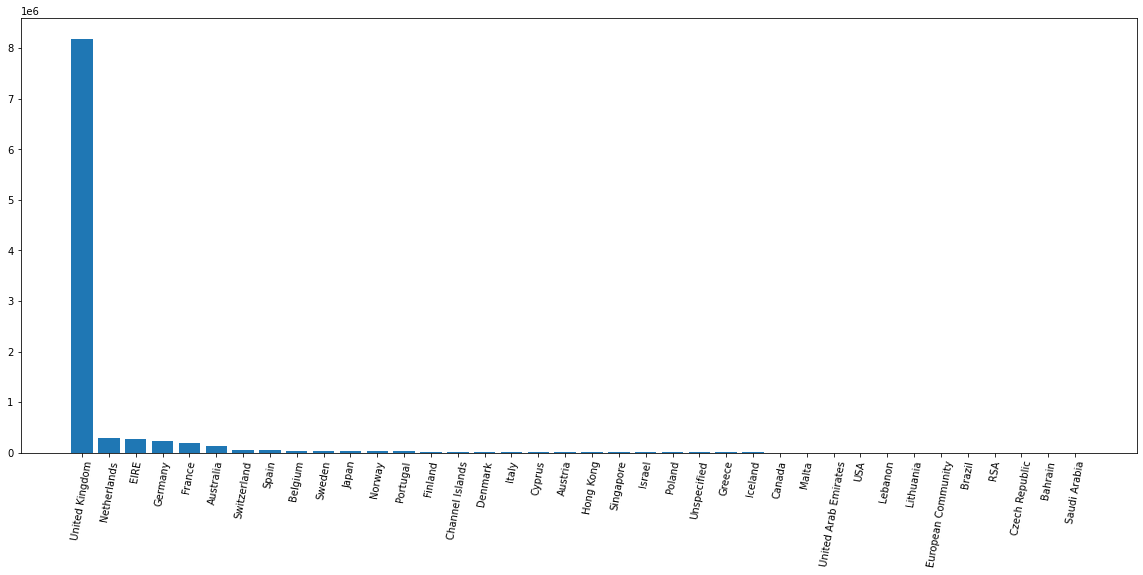

In [8]:
plt.bar(df_country.index,df_country['Total Amount'])
plt.xticks(df_country.index,labels=df_country.index, rotation=80)
plt.show()

In [9]:
print("The top 10 countries which has done more transactions are")
for i in range(10):
    print(df_country.index[i])

The top 10 countries which has done more transactions are
United Kingdom
Netherlands
EIRE
Germany
France
Australia
Switzerland
Spain
Belgium
Sweden


In [10]:
df_time = df[['Quantity','Total Amount','InvoiceDate','Country']]
df_time.head()

,Quantity,Total Amount,InvoiceDate,Country
0,6,15.30,2010-12-01 08:26:00,United Kingdom
1,6,20.34,2010-12-01 08:26:00,United Kingdom
2,8,22.00,2010-12-01 08:26:00,United Kingdom
3,6,20.34,2010-12-01 08:26:00,United Kingdom
4,6,20.34,2010-12-01 08:26:00,United Kingdom


In [11]:
df_time['Month'] = df_time['InvoiceDate'].dt.month
df_time['Year'] = df_time['InvoiceDate'].dt.year

C:\Users\God\AppData\Local\Temp/ipykernel_5236/2920367215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Month'] = df_time['InvoiceDate'].dt.month
C:\Users\God\AppData\Local\Temp/ipykernel_5236/2920367215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Year'] = df_time['InvoiceDate'].dt.year


In [12]:
df_time.head()

,Quantity,Total Amount,InvoiceDate,Country,Month,Year
0,6,15.30,2010-12-01 08:26:00,United Kingdom,12,2010
1,6,20.34,2010-12-01 08:26:00,United Kingdom,12,2010
2,8,22.00,2010-12-01 08:26:00,United Kingdom,12,2010
3,6,20.34,2010-12-01 08:26:00,United Kingdom,12,2010
4,6,20.34,2010-12-01 08:26:00,United Kingdom,12,2010


In [13]:
df2 = df_time.groupby(['Month','Year']).sum()
df2 = df2.sort_values('Total Amount',ascending=False)

<AxesSubplot:xlabel='Month,Year'>

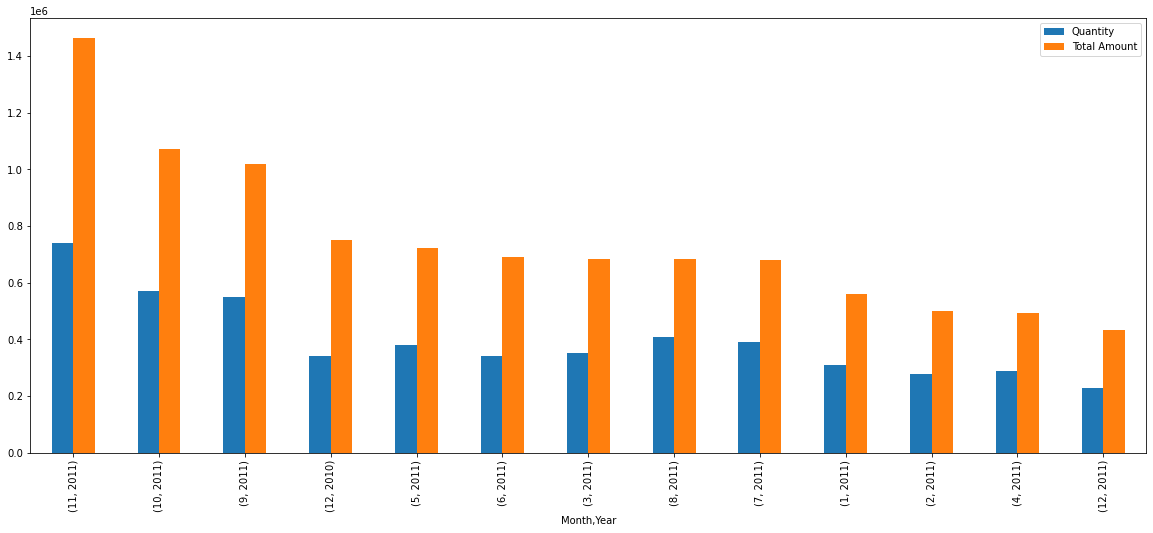

In [14]:
df2.plot(kind='bar')

# November 2011 has had the highest sales

In [15]:
df_country_time = df_time.groupby('Country').max()

Text(0.5, 1.0, 'Monthly Sales of each Country')

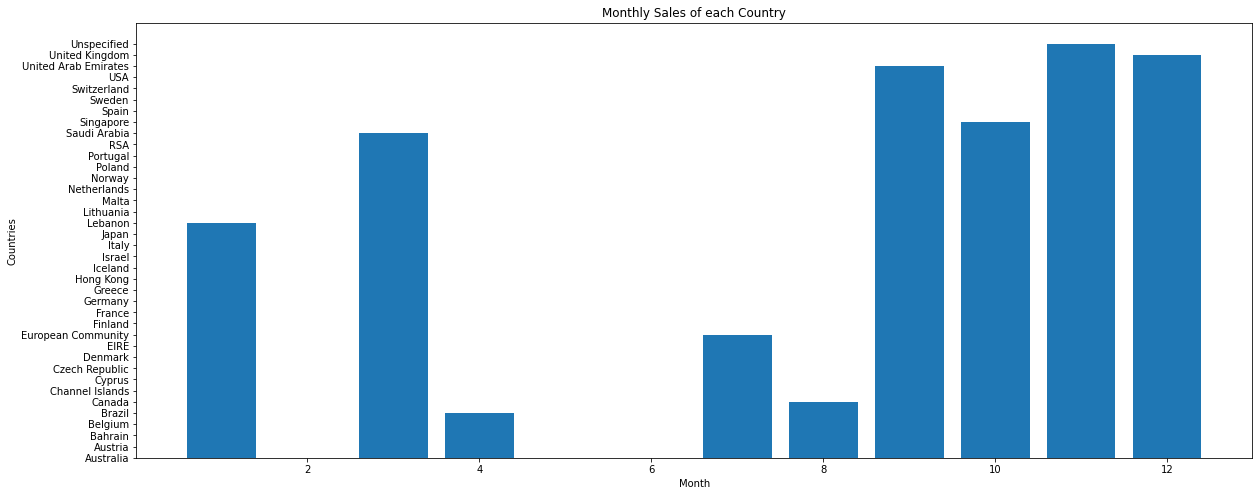

In [16]:
plt.bar(df_country_time['Month'],df_country_time.index)
plt.xlabel('Month')
plt.ylabel('Countries')
plt.title('Monthly Sales of each Country')

# In all countries, November and December has the highest sales

In [17]:
df_product = df[['Total Amount','Country','StockCode','Description','Country','InvoiceDate']]
df_product

,Total Amount,Country,StockCode,Description,Country,InvoiceDate
0,15.30,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2010-12-01 08:26:00
1,20.34,United Kingdom,71053,WHITE METAL LANTERN,United Kingdom,2010-12-01 08:26:00
2,22.00,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2010-12-01 08:26:00
3,20.34,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,2010-12-01 08:26:00
4,20.34,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,2010-12-01 08:26:00
...,...,...,...,...,...,...
541904,10.20,France,22613,PACK OF 20 SPACEBOY NAPKINS,France,2011-12-09 12:50:00
541905,12.60,France,22899,CHILDREN'S APRON DOLLY GIRL,France,2011-12-09 12:50:00
541906,16.60,France,23254,CHILDRENS CUTLERY DOLLY GIRL,France,2011-12-09 12:50:00
541907,16.60,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,France,2011-12-09 12:50:00


In [18]:
df_product.drop_duplicates(inplace=True)

C:\Users\God\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# Clustering patterns

In [21]:
dfm = pd.DataFrame(df.groupby('CustomerID')['Total Amount'].sum())
dfm

,Total Amount
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [22]:
dfm = dfm.reset_index()
dfm

,CustomerID,Total Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [23]:
dff = df.groupby('CustomerID')['InvoiceNo'].count()
dff = dff.reset_index()

In [24]:
dff

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   Total Amount  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [26]:
today = max(df['InvoiceDate'])
today

Timestamp('2011-12-09 12:50:00')

In [27]:
df['TimeDiff'] = today - df['InvoiceDate']

In [28]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,TimeDiff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


In [29]:
dfr = df.groupby('CustomerID')['TimeDiff'].min()
dfr = dfr.reset_index()

In [30]:
dfr['TimeDiff'] = dfr['TimeDiff'].dt.days

In [31]:
dfr

,CustomerID,TimeDiff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [32]:
rfm = pd.merge(dfm,dff,how='inner',on='CustomerID')
rfm

,CustomerID,Total Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [33]:
rfm = pd.merge(rfm,dfr,on='CustomerID',how='inner')
rfm

,CustomerID,Total Amount,InvoiceNo,TimeDiff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


In [34]:
rfm.columns = ['CustomerID','Monetary','Frequency','Recency']

In [35]:
rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<AxesSubplot:>

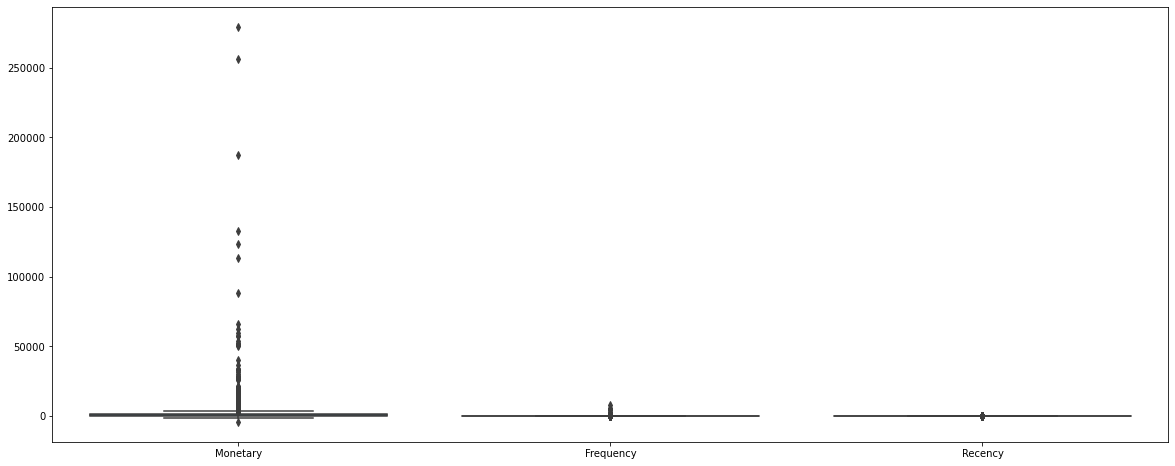

In [36]:
sns.boxplot(data=rfm[['Monetary','Frequency','Recency']])

In [37]:
Q1 = rfm.Monetary.quantile(0.25)
Q3 = rfm.Monetary.quantile(0.75)
IQR = Q3-Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]

Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3-Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3-Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

In [38]:
rfm

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


In [39]:
rfm2 = rfm[['Monetary','Frequency','Recency']]
rfm2

,Monetary,Frequency,Recency
0,0.00,2,325
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
5,1545.41,95,35
...,...,...,...
4366,173.90,9,73
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7


In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [41]:
rfm_scaled = scale.fit_transform(rfm2)
rfm_scaled

array([[-1.04161396, -1.07094871,  2.13642223],
       [ 1.38529792, -0.3754979 , -0.28204953],
       [ 1.33170234,  0.63170672, -0.82162889],
       ...,
       [-0.93247827, -0.9510434 ,  0.73929711],
       [-0.80314128, -0.80715703, -0.92761769],
       [ 1.43936613,  0.55976353, -0.59038059]])

In [42]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled

,0,1,2
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828
...,...,...,...
3692,-0.806787,-0.903081,-0.291685
3693,-0.797740,-0.879100,1.673926
3694,-0.932478,-0.951043,0.739297
3695,-0.803141,-0.807157,-0.927618


In [43]:
rfm_scaled.columns = ['Monetary','Frequency','Recency']

In [44]:
rfm_scaled

,Monetary,Frequency,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828
...,...,...,...
3692,-0.806787,-0.903081,-0.291685
3693,-0.797740,-0.879100,1.673926
3694,-0.932478,-0.951043,0.739297
3695,-0.803141,-0.807157,-0.927618


In [45]:
from sklearn.cluster import KMeans

In [46]:
li = []
for i in range(1,11):
  kmean = KMeans(n_clusters=i)
  kmean.fit(rfm_scaled)
  li.append(kmean.inertia_)
li

[11091.000000000024,
 6206.330006580117,
 3757.9444969397878,
 2952.9218593152455,
 2516.655490589153,
 2201.032811314741,
 1952.561197702467,
 1772.1387330564403,
 1611.5297495808525,
 1500.1830292983118]

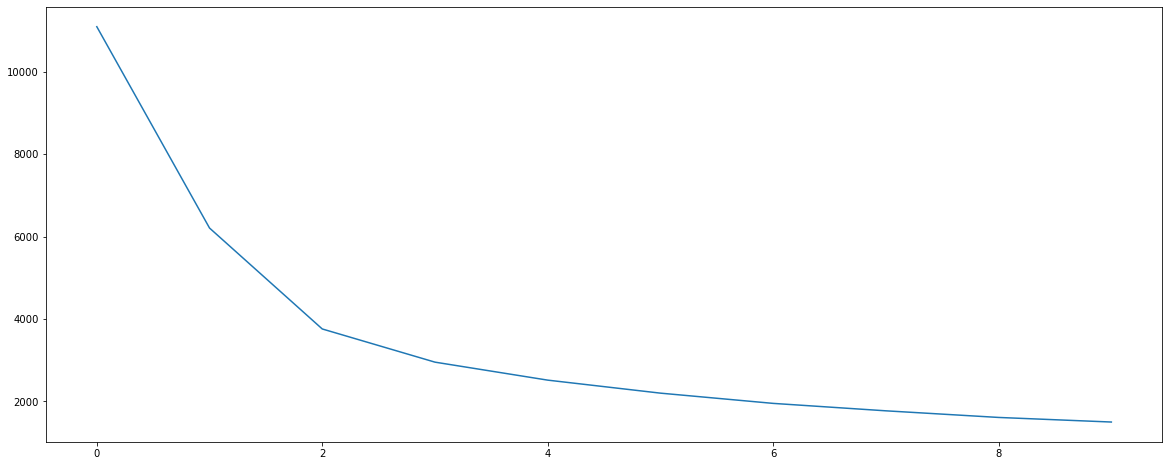

In [47]:
plt.plot(li)

In [48]:
kmean = KMeans(n_clusters=3)
kmean.fit(rfm_scaled)

KMeans(n_clusters=3)

In [49]:
rfm['ClusterID'] = kmean.labels_

In [50]:
rfm

,CustomerID,Monetary,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2
5,12352.0,1545.41,95,35,1
...,...,...,...,...,...
4366,18278.0,173.90,9,73,0
4367,18280.0,180.60,10,277,2
4368,18281.0,80.82,7,180,2
4369,18282.0,176.60,13,7,0


<AxesSubplot:xlabel='ClusterID', ylabel='Monetary'>

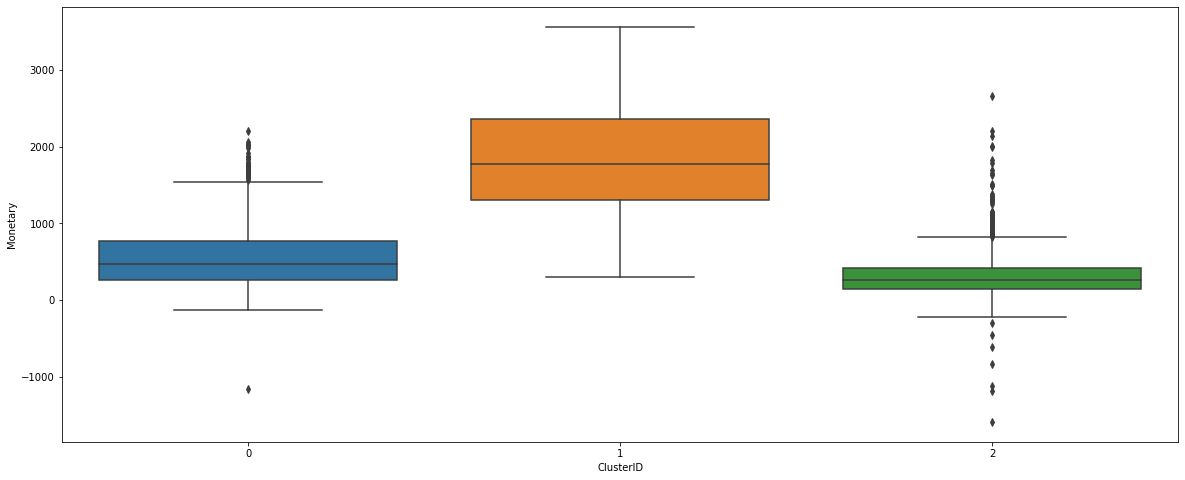

In [51]:
sns.boxplot(x='ClusterID',y='Monetary',data=rfm)

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency'>

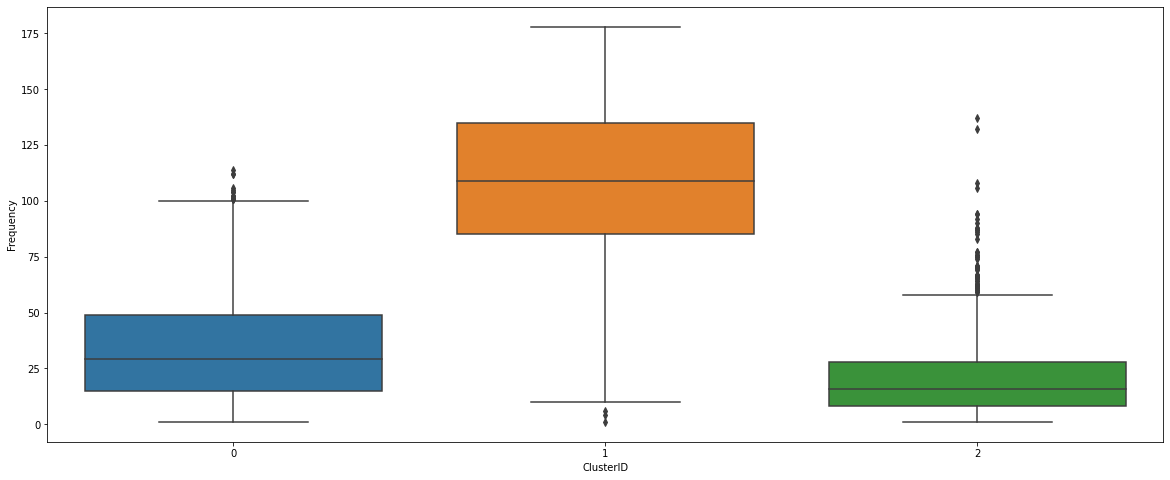

In [52]:
sns.boxplot(x='ClusterID',y='Frequency',data=rfm)

<AxesSubplot:xlabel='ClusterID', ylabel='Recency'>

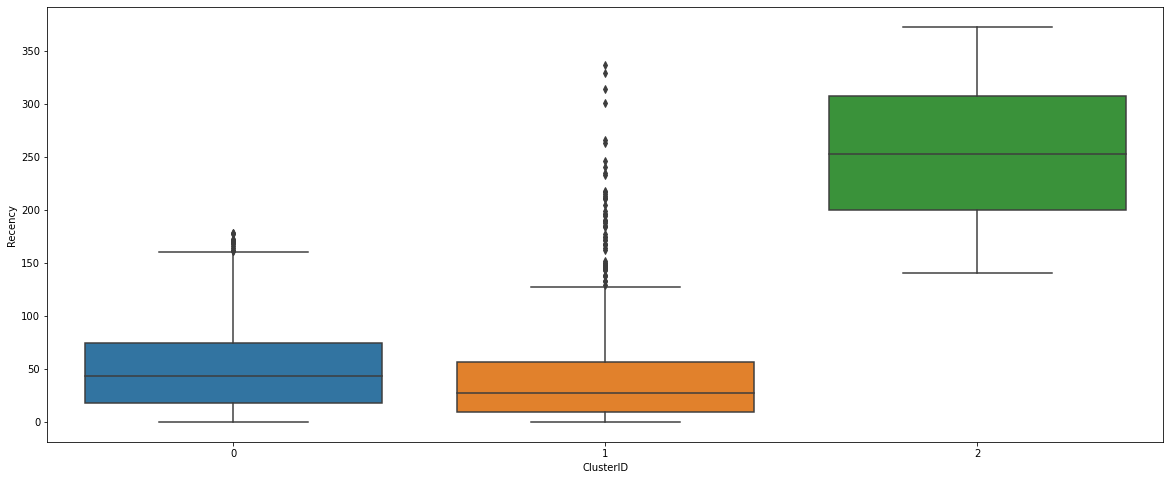

In [53]:
sns.boxplot(x='ClusterID',y='Recency',data=rfm)